In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


##### Reading data

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### dropping species column

In [5]:
iris2 = iris.drop('species', axis=1)

In [6]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Algorithm

In [7]:
KMC = KMeans(n_clusters=4)
predict = KMC.fit_predict(iris2)

In [8]:
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int32)

##### New column

In [9]:
iris['group'] = predict

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,group
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


In [11]:
KMC.cluster_centers_

array([[5.52962963, 2.62222222, 3.94074074, 1.21851852],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.23658537, 2.85853659, 4.80731707, 1.62195122]])

In [12]:
#sum of error
sse = []
for k in range(1,10):
    KM = KMeans(n_clusters=k)
    KM.fit(iris2)
    sse.append(KM.inertia_)

In [13]:
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.65220948525159,
 30.185664730006835,
 27.82132797903851]

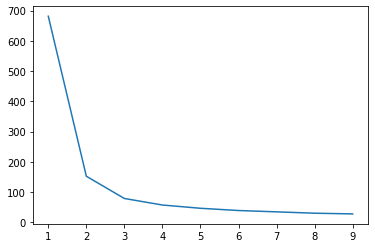

In [14]:
plt.plot(range(1,10), sse)